In [15]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import scipy as sp
import seaborn as sns
from pandas.tools.plotting import scatter_matrix
sns.set()
sns.set_color_codes()


In [16]:
daily_activities = pd.read_csv("../Takeout/Fit/Daily Aggregations/Daily Summaries.csv",
                              index_col = "Date", parse_dates=True)
print(daily_activities.shape)
daily_activities.head()

(380, 21)


,Calories (kcal),Distance (m),Average heart rate (bpm),Max heart rate (bpm),Min heart rate (bpm),Low latitude (deg),Low longitude (deg),High latitude (deg),High longitude (deg),Average speed (m/s),...,Min speed (m/s),Step count,Average weight (kg),Max weight (kg),Min weight (kg),Biking duration (ms),Inactive duration (ms),Walking duration (ms),Running duration (ms),Other duration (ms)
Date,,,,,,,,,,,,,,,,,,,,,
2014-04-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-07-29,654.456055,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-07-30,1538.692627,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-07-31,1538.692627,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-08-01,1538.692627,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


* droppping rows with no caloric information

In [17]:
daily_activities = daily_activities[np.isfinite(daily_activities['Calories (kcal)'])]
print(daily_activities.shape)
daily_activities.columns

(307, 21)


Index(['Calories (kcal)', 'Distance (m)', 'Average heart rate (bpm)',
       'Max heart rate (bpm)', 'Min heart rate (bpm)', 'Low latitude (deg)',
       'Low longitude (deg)', 'High latitude (deg)', 'High longitude (deg)',
       'Average speed (m/s)', 'Max speed (m/s)', 'Min speed (m/s)',
       'Step count', 'Average weight (kg)', 'Max weight (kg)',
       'Min weight (kg)', 'Biking duration (ms)', 'Inactive duration (ms)',
       'Walking duration (ms)', 'Running duration (ms)',
       'Other duration (ms)'],
      dtype='object')

In [18]:
daily_activities['Calories (kcal)'].describe()

count     307.000000
mean     1748.309459
std       422.403924
min       161.972321
25%      1538.692627
50%      1593.387207
75%      1854.186829
max      4271.371094
Name: Calories (kcal), dtype: float64

In [19]:
daily_activities.describe()

/Users/kivan/anaconda3/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,Calories (kcal),Distance (m),Average heart rate (bpm),Max heart rate (bpm),Min heart rate (bpm),Low latitude (deg),Low longitude (deg),High latitude (deg),High longitude (deg),Average speed (m/s),...,Min speed (m/s),Step count,Average weight (kg),Max weight (kg),Min weight (kg),Biking duration (ms),Inactive duration (ms),Walking duration (ms),Running duration (ms),Other duration (ms)
count,307.000000,194.000000,77.000000,77.000000,77.000000,198.000000,198.000000,198.000000,198.000000,153.000000,...,153.000000,296.000000,1.000000,1.000000,1.000000,2.000000e+00,2.540000e+02,1.780000e+02,8.900000e+01,1.0
mean,1748.309459,5606.910079,142.492167,174.675325,93.584416,44.803068,-117.564835,45.355255,-116.603147,3.532132,...,0.406717,13530.233108,70.306763,70.306763,70.306763,1.664988e+06,7.981153e+07,2.473682e+06,2.962823e+06,1141129.0
std,422.403924,6966.157160,23.699763,19.894750,22.302555,7.039480,16.800202,6.239949,17.733867,4.467753,...,0.655118,10324.483497,NaN,NaN,NaN,1.912034e+06,9.955657e+06,2.055097e+06,2.259063e+06,NaN
min,161.972321,10.685171,78.255074,94.000000,46.000000,18.438169,-122.909492,18.454325,-122.909477,0.000000,...,0.000000,16.000000,70.306763,70.306763,70.306763,3.129750e+05,1.402194e+07,4.563000e+04,7.667300e+04,1141129.0
25%,1538.692627,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,1593.387207,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1854.186829,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,4271.371094,42658.296875,172.940353,207.000000,138.000000,49.991394,8.237741,50.002316,8.261198,24.469522,...,4.600000,71656.000000,70.306763,70.306763,70.306763,3.017000e+06,8.640000e+07,9.604666e+06,1.426350e+07,1141129.0


In [20]:
daily_activities[daily_activities['Calories (kcal)']==daily_activities['Calories (kcal)'].max()]

,Calories (kcal),Distance (m),Average heart rate (bpm),Max heart rate (bpm),Min heart rate (bpm),Low latitude (deg),Low longitude (deg),High latitude (deg),High longitude (deg),Average speed (m/s),...,Min speed (m/s),Step count,Average weight (kg),Max weight (kg),Min weight (kg),Biking duration (ms),Inactive duration (ms),Walking duration (ms),Running duration (ms),Other duration (ms)
Date,,,,,,,,,,,,,,,,,,,,,
2015-11-29,4271.371094,42658.296875,150.215591,201.0,103.0,47.548939,-122.348244,47.664684,-122.246597,2.277518,...,0.0,38167.0,NaN,NaN,NaN,NaN,67816218.0,1288857.0,14263500.0,NaN


In [24]:
daily_activities["Distance (miles)"] = daily_activities['Distance (m)']/1609.34

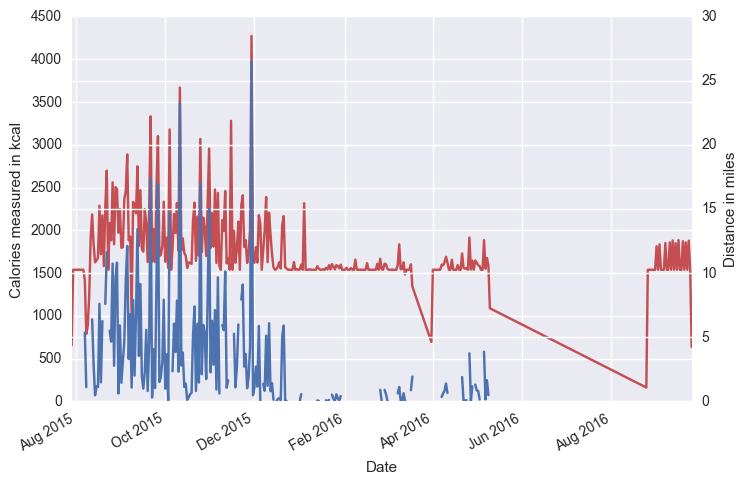

In [25]:
fig, ax1 = plt.subplots() #Initialize plots

ax2 = ax1.twinx()
ax1.plot(daily_activities.index, daily_activities['Calories (kcal)'], '-r') # Percipitation plot
ax2.plot(daily_activities.index, daily_activities['Distance (miles)']) # Tmax

ax1.set_xlabel('Date') #Label axis
ax1.set_ylabel('Calories measured in kcal')
ax2.set_ylabel('Distance in miles')
fig.autofmt_xdate() # Makes sure the dates on x axis don't overlap

plt.show()

In [31]:
marathon = pd.read_csv("../Takeout/Fit/Daily Aggregations/2015-11-29.csv")
print(marathon.shape)
marathon.head()

(96, 21)


,Start time,End time,Calories (kcal),Distance (m),Average heart rate (bpm),Max heart rate (bpm),Min heart rate (bpm),Low latitude (deg),Low longitude (deg),High latitude (deg),...,Average speed (m/s),Max speed (m/s),Min speed (m/s),Step count,Average weight (kg),Max weight (kg),Min weight (kg),Inactive duration (ms),Walking duration (ms),Running duration (ms)
0,00:00:00.000-08:00,00:15:00.000-08:00,16.028048,NaN,NaN,NaN,NaN,47.664494,-122.306732,47.664494,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,900000.0,NaN,NaN
1,00:15:00.000-08:00,00:30:00.000-08:00,16.028048,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,900000.0,NaN,NaN
2,00:30:00.000-08:00,00:45:00.000-08:00,16.028048,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,900000.0,NaN,NaN
3,00:45:00.000-08:00,01:00:00.000-08:00,16.028048,NaN,NaN,NaN,NaN,47.664455,-122.306747,47.664520,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,900000.0,NaN,NaN
4,01:00:00.000-08:00,01:15:00.000-08:00,16.028048,NaN,NaN,NaN,NaN,47.664478,-122.306694,47.664478,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,900000.0,NaN,NaN
